In [1]:
from standardInclude import *

Welcome to JupyROOT 6.12/06
For interactive plots, run: setint()
To return to non-interactive plots (default state), run: noint()


In [2]:
f = r.TFile("./data/gm2offline_ana_xtalHits.root")
f.cd("farline")
f.ls()

TFile**		./data/gm2offline_ana_xtalHits.root	
 TFile*		./data/gm2offline_ana_xtalHits.root	
  TDirectoryFile*		farline	farline (CaloFarlineHistograms) folder
   KEY: TDirectoryFile	calo1;1	calo1
   KEY: TDirectoryFile	calo2;1	calo2
   KEY: TDirectoryFile	calo3;1	calo3
   KEY: TDirectoryFile	calo4;1	calo4
   KEY: TDirectoryFile	calo5;1	calo5
   KEY: TDirectoryFile	calo6;1	calo6
   KEY: TDirectoryFile	calo7;1	calo7
   KEY: TDirectoryFile	calo8;1	calo8
   KEY: TDirectoryFile	calo9;1	calo9
   KEY: TDirectoryFile	calo10;1	calo10
   KEY: TDirectoryFile	calo11;1	calo11
   KEY: TDirectoryFile	calo12;1	calo12
   KEY: TDirectoryFile	calo13;1	calo13
   KEY: TDirectoryFile	calo14;1	calo14
   KEY: TDirectoryFile	calo15;1	calo15
   KEY: TDirectoryFile	calo16;1	calo16
   KEY: TDirectoryFile	calo17;1	calo17
   KEY: TDirectoryFile	calo18;1	calo18
   KEY: TDirectoryFile	calo19;1	calo19
   KEY: TDirectoryFile	calo20;1	calo20
   KEY: TDirectoryFile	calo21;1	calo21
   KEY: TDirectoryFile	calo22;1	calo22
  

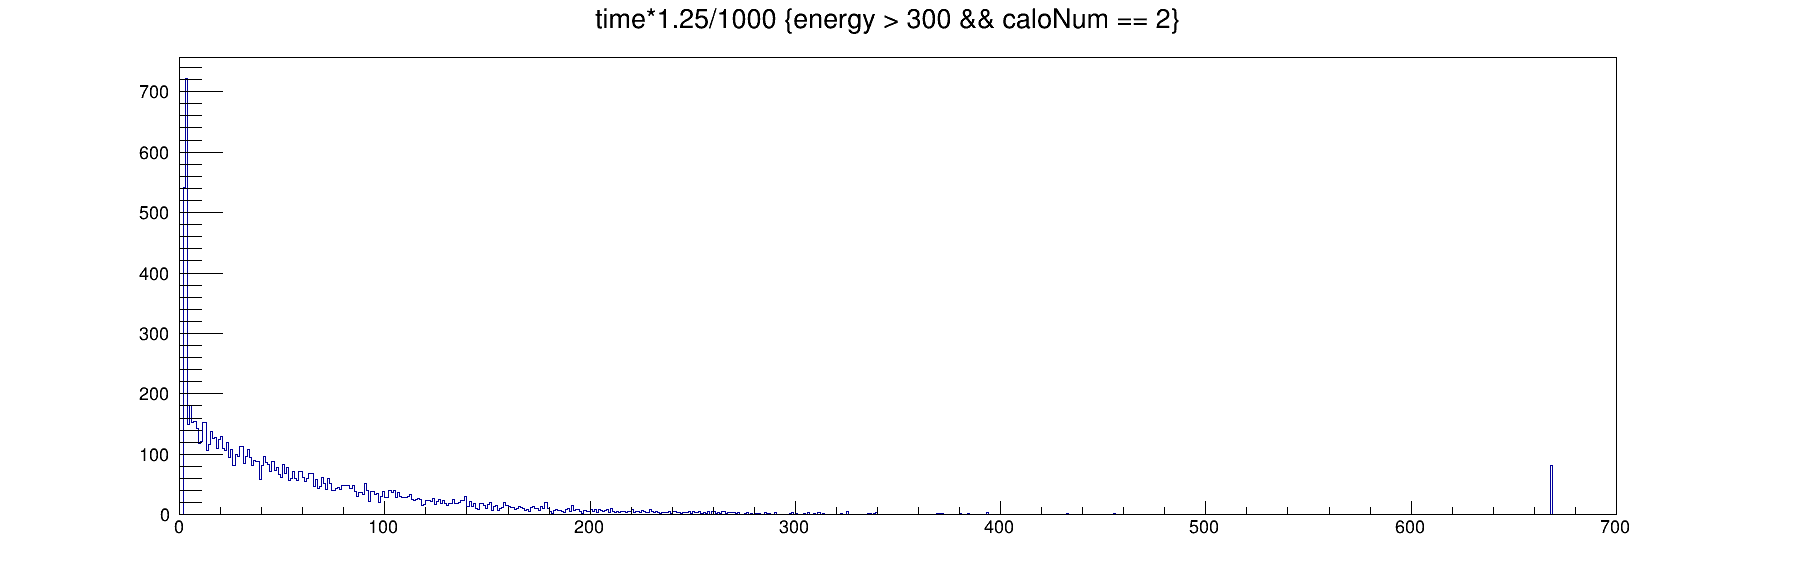

In [3]:
t = f.Get("farline/eventTree")
c = r.TCanvas("c","c",1800,600)
t.Draw("time*1.25/1000>>hist(700,0,700)","energy > 300 && caloNum == 2","")
c.Draw()

In [4]:
calo = 2
hx = f.Get("farline/calo"+str(calo)+"/xHitPositionsVsTimeVsEnergy").Clone("hx")
hx.SetDirectory(0)
hy = f.Get("farline/calo"+str(calo)+"/yHitPositionsVsTimeVsEnergy").Clone("hy")
hy.SetDirectory(0)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


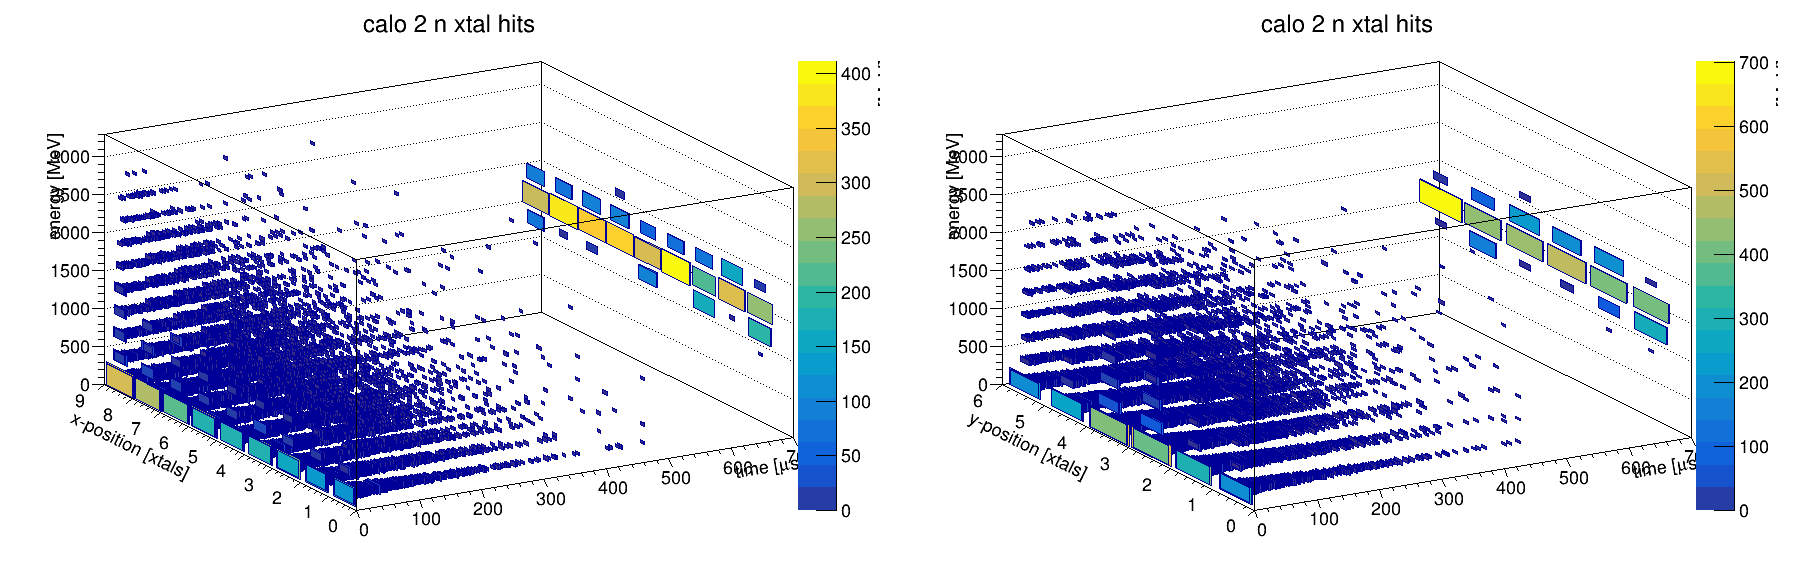

In [5]:
c = r.TCanvas("c","c",1800,600)
c.Divide(2)
c.cd(1)
hx.Draw("lego2z")
c.cd(2)
hy.Draw("lego2z")
c.Draw()

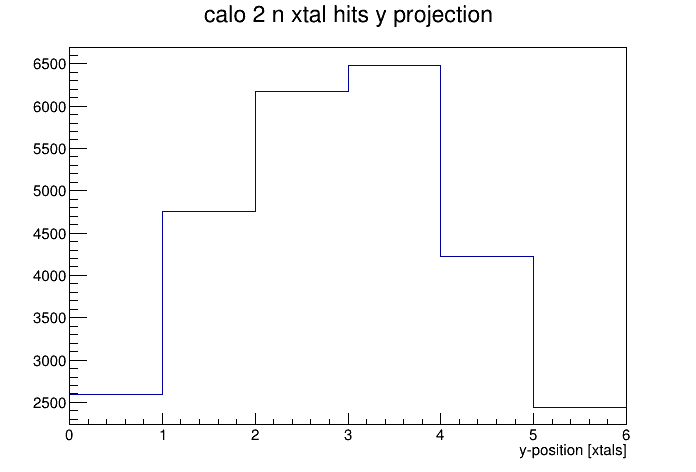

In [6]:
c = r.TCanvas()
hy.GetYaxis().SetRange(2,-1)
hy.GetXaxis().SetRange(1,60)
hy.Project3D("y").Draw("colz")
c.SetLogz()
c.Draw()

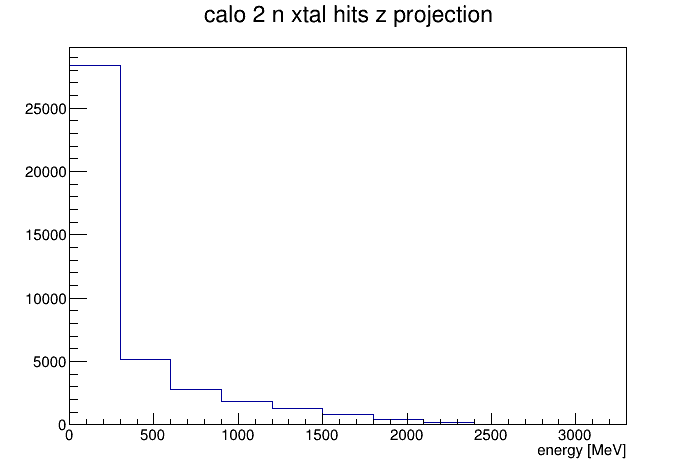

In [7]:
c = r.TCanvas()
hx.GetYaxis().SetRange(2,-1)
hx.GetXaxis().SetRange(1,600)
hx.Project3D("z").Draw("colz")
c.SetLogz()
c.Draw()

---
### Now lets loop over the time bins and get a mean/width for each one

Z range (bins): 2 11
      (energy): 300.0 3000.0
Done. Creating animation...
All done.
Toast Notification Sent


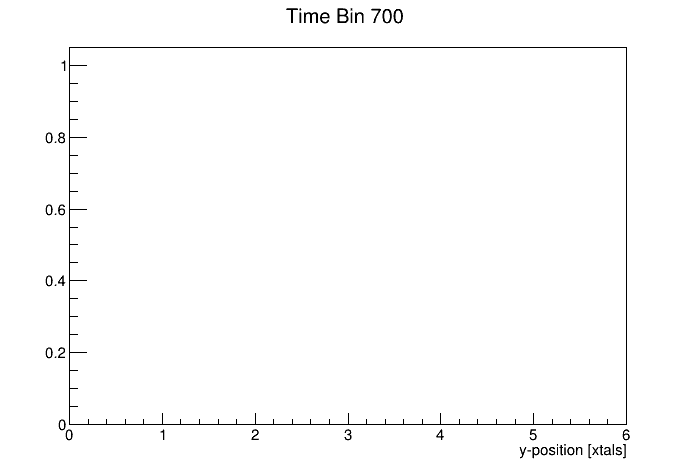

In [8]:
eMin = 250
eMax = 3000

eMinBin = hy.GetZaxis().FindBin(eMin) + 1
eMaxBin = hy.GetZaxis().FindBin(eMax)
print("Z range (bins):", eMinBin, eMaxBin)
print("      (energy):", 
     hy.GetZaxis().GetBinCenter(eMinBin) - hy.GetZaxis().GetBinWidth(eMinBin)/2.,
     hy.GetZaxis().GetBinCenter(eMaxBin) - hy.GetZaxis().GetBinWidth(eMaxBin)/2.
     )
hy.GetZaxis().SetRange(eMinBin, eMaxBin)

yParams = []

for timeBin in range(1,hy.GetNbinsX()+1):
    #if(timeBin > 10):
    #    break
        
    hy.GetXaxis().SetRange(timeBin, timeBin)
    hi = hy.Project3D("y")
    hi.SetTitle("Time Bin "+str(timeBin))
    
    paramsi = [hi.GetMean(), hi.GetRMS()]
   
    c = r.TCanvas()
    hi.Draw()
    c.Draw()
    #c.Print("./images/XtalHit_Yposition_"+str(timeBin).zfill(3)+".png")
    
    if(hi.GetEntries() > 0):
        yParams.append(paramsi)
    else:
        yParams.append([np.nan for i in range(len(paramsi))])
    
#print(yParams)
print("Done. Creating animation...")
#os.system("convert -delay 30 ./images/XtalHit_Yposition_*png XtalHit_Yposition.gif")
print("All done.")
toast("All done.")

In [22]:
numGraphs = len(yParams[0])
graphs = [np.nan for i in range(numGraphs)]
for i in range(numGraphs):
    graphs[i] = r.TGraph()
print(graphs)

[<ROOT.TGraph object at 0x7fffe3cbb3d0>, <ROOT.TGraph object at 0x7fffe3d38d30>]


In [23]:
paramCounters = [0 for i in range(numGraphs)]
for i, paramsi in enumerate(yParams):
    for j, param in enumerate(paramsi):
        if(param != 0. and param is not np.nan):
            #print(param)
            paramCounters[j] += 1
            graphs[j].SetPoint(paramCounters[j], i, param)


****************************************
Minimizer is Linear
Chi2                      =      224.406
NDf                       =          360
p0                        =       2.9741   +/-   0.0760222   
p1                        = -7.73838e-05   +/-   0.000330831 


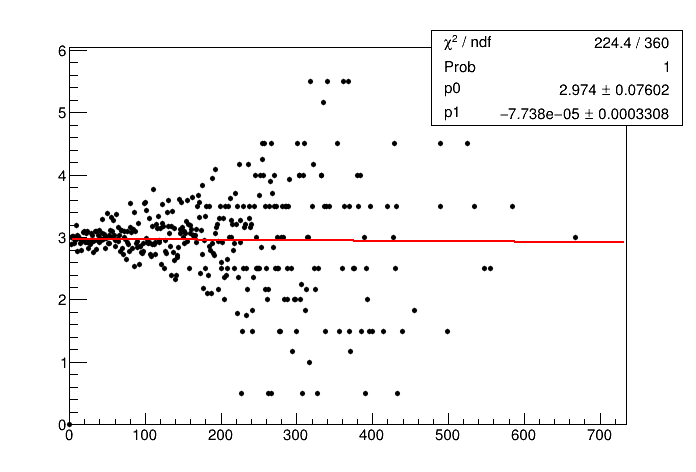

In [24]:
c = r.TCanvas()

gri = graphs[0]
gri.SetMarkerStyle(8)
gri.SetMarkerSize(0.7)
gri.Draw("ap")
gri.Fit("pol1")

c.Draw()


****************************************
Minimizer is Linear
Chi2                      =      28.9637
NDf                       =          295
p0                        =      1.41288   +/-   0.0335679   
p1                        =  -0.00132774   +/-   0.000180212 


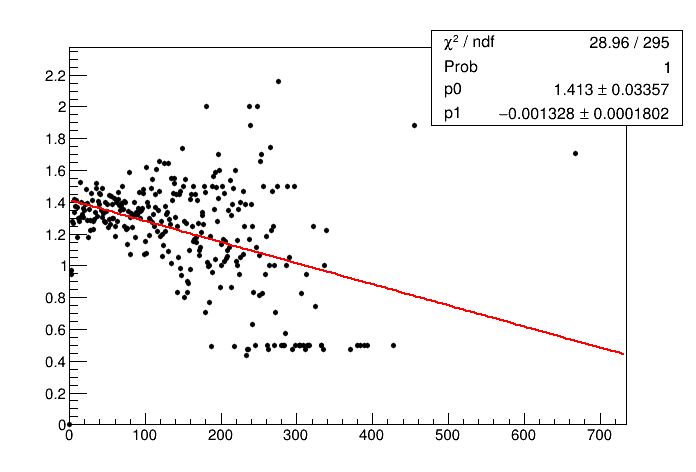

In [25]:
c = r.TCanvas()

gri = graphs[1]
gri.SetMarkerStyle(8)
gri.SetMarkerSize(0.7)
gri.Draw("ap")
gri.Fit("pol1")

c.Draw()

In [26]:
means, devs = zip(*yParams)

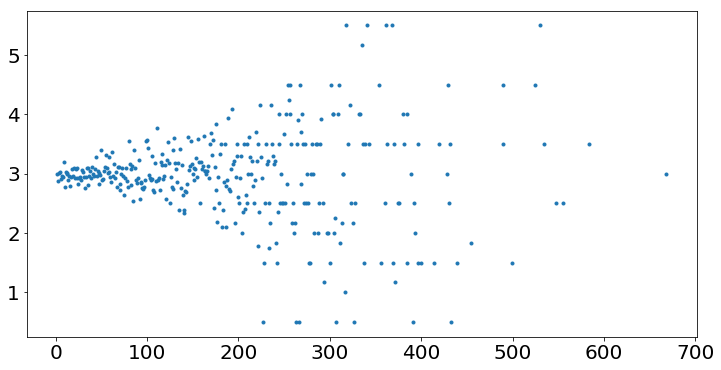

In [29]:
fig,ax = plt.subplots(figsize=(12,6))
plt.plot(means,".")
plt.show()

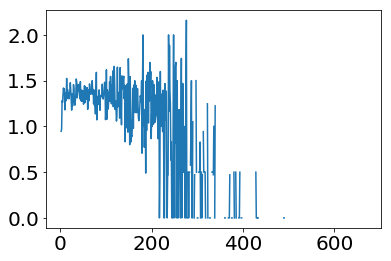

In [30]:
plt.plot(devs)
plt.show()